In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
# Carregando o dataset já com os dados de engajamento
df_twitter = pd.read_csv("df_tweets_engajamento.csv")

del df_twitter['Unnamed: 0']

In [3]:
df_twitter.head(5)

,User,Date Created,Number of Likes,Number of Retweets,Number of Quotes,Number of Replies,Source of Tweet,Tweet
0,fatooufake,202208,4,0,0,2,TweetDeck,"Candidato à reeleição pelo PL participou, nest..."
1,fatooufake,202208,7,0,0,1,TweetDeck,Candidato do PSDB ao governo do DF participou ...
2,fatooufake,202208,7,1,0,1,TweetDeck,A entrevista foi transmitida ao vivo pela rádi...
3,fatooufake,202208,7,0,0,1,TweetDeck,"Frases foram ditas em redes sociais, no horári..."
4,fatooufake,202208,6,1,0,1,TweetDeck,Candidato ao governo do Rio pelo PDT participo...


In [4]:
# Tratando a coluna 'text' : convertendo todas as letras maiúsculas em minúsculas
df_twitter['Tweet'] = df_twitter['Tweet'].str.lower()

df_twitter.head(5)

,User,Date Created,Number of Likes,Number of Retweets,Number of Quotes,Number of Replies,Source of Tweet,Tweet
0,fatooufake,202208,4,0,0,2,TweetDeck,"candidato à reeleição pelo pl participou, nest..."
1,fatooufake,202208,7,0,0,1,TweetDeck,candidato do psdb ao governo do df participou ...
2,fatooufake,202208,7,1,0,1,TweetDeck,a entrevista foi transmitida ao vivo pela rádi...
3,fatooufake,202208,7,0,0,1,TweetDeck,"frases foram ditas em redes sociais, no horári..."
4,fatooufake,202208,6,1,0,1,TweetDeck,candidato ao governo do rio pelo pdt participo...


In [5]:
# Baixando stopwords
nltk.download('stopwords')

# Para a seleção das stopwords do português, basta adicionar 'portuguese'
stopwords_port = nltk.corpus.stopwords.words('portuguese')
stopwords_port[:20]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele']

In [6]:
# Análise I: agrupado por mês/ano, contando o total de tweets, em cada um dos painéis de checagem
pd.set_option("display.max_rows", 100) # aumentando a quantidade de linhas para exibição

df_twitter.groupby(by= ['User', 'Date Created'])['User'].count()

User             Date Created
agencialupa      202107          179
                 202108          233
                 202109          245
                 202110          219
                 202111          286
                 202112          239
                 202201          275
                 202202          266
                 202203          297
                 202204          179
                 202205          125
                 202206          157
                 202207          172
                 202208          330
estadaoverifica  202105           53
                 202106           65
                 202107           72
                 202108           52
                 202109           50
                 202110           47
                 202111           52
                 202112           46
                 202201           43
                 202202           60
                 202203           61
                 202204           81
        

<AxesSubplot:xlabel='Date Created'>

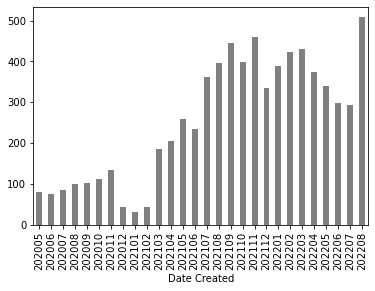

In [7]:
# O volume no tempo
df_twitter.groupby(by= 'Date Created')['User'].count().plot.bar(color=['grey']) # ajustar a ordenação

In [8]:
# Análise II: observando o total de observações, em cada um dos painéis de checagem
df_twitter.groupby(by= 'User')['User'].count()

User
agencialupa        3202
estadaoverifica     962
fatooufake         1039
uolconfere         1938
Name: User, dtype: int64

In [17]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
from unidecode import unidecode

nltk.download('punkt') 

# Removendo stopwords & pontuação
stopwords = set(stopwords.words('portuguese')+list(punctuation))

df_twitter['text_sem_stopwords'] = df_twitter['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
# df_twitter['text_sem_stopwords'] = df_twitter['text_sem_stopwords'].str.replace('[^A-Za-z0-9]', ' ')

sentencas = df_twitter['text_sem_stopwords'].apply(sent_tokenize)
palavras = df_twitter['text_sem_stopwords'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\clara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
# Retirando a acentuação das palavras
df_twitter['text_sem_stopwords'] = df_twitter['text_sem_stopwords'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [21]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
df_twitter['tokenized'] = df_twitter['text_sem_stopwords'].apply(tt.tokenize)

df_twitter.head(5)

,User,Date Created,Number of Likes,Number of Retweets,Number of Quotes,Number of Replies,Source of Tweet,Tweet,text_sem_stopwords,tokenized
0,fatooufake,202208,4,0,0,2,TweetDeck,"candidato à reeleição pelo pl participou, nest...","candidato reeleicao pl participou, nesta quart...","[candidato, reeleicao, pl, participou, ,, nest..."
1,fatooufake,202208,7,0,0,1,TweetDeck,candidato do psdb ao governo do df participou ...,candidato psdb governo df participou serie ent...,"[candidato, psdb, governo, df, participou, ser..."
2,fatooufake,202208,7,1,0,1,TweetDeck,a entrevista foi transmitida ao vivo pela rádi...,entrevista transmitida vivo radio sites redes ...,"[entrevista, transmitida, vivo, radio, sites, ..."
3,fatooufake,202208,7,0,0,1,TweetDeck,"frases foram ditas em redes sociais, no horári...","frases ditas redes sociais, horario eleitoral ...","[frases, ditas, redes, sociais, ,, horario, el..."
4,fatooufake,202208,6,1,0,1,TweetDeck,candidato ao governo do rio pelo pdt participo...,"candidato governo rio pdt participou, nesta se...","[candidato, governo, rio, pdt, participou, ,, ..."


In [22]:
df_twitter['text_string'] = df_twitter['tokenized'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [23]:
df_twitter

,User,Date Created,Number of Likes,Number of Retweets,Number of Quotes,Number of Replies,Source of Tweet,Tweet,text_sem_stopwords,tokenized,text_string
0,fatooufake,202208,4,0,0,2,TweetDeck,"candidato à reeleição pelo pl participou, nest...","candidato reeleicao pl participou, nesta quart...","[candidato, reeleicao, pl, participou, ,, nest...",candidato reeleicao participou nesta quarta-fe...
1,fatooufake,202208,7,0,0,1,TweetDeck,candidato do psdb ao governo do df participou ...,candidato psdb governo df participou serie ent...,"[candidato, psdb, governo, df, participou, ser...",candidato psdb governo participou serie entrev...
2,fatooufake,202208,7,1,0,1,TweetDeck,a entrevista foi transmitida ao vivo pela rádi...,entrevista transmitida vivo radio sites redes ...,"[entrevista, transmitida, vivo, radio, sites, ...",entrevista transmitida vivo radio sites redes ...
3,fatooufake,202208,7,0,0,1,TweetDeck,"frases foram ditas em redes sociais, no horári...","frases ditas redes sociais, horario eleitoral ...","[frases, ditas, redes, sociais, ,, horario, el...",frases ditas redes sociais horario eleitoral e...
4,fatooufake,202208,6,1,0,1,TweetDeck,candidato ao governo do rio pelo pdt participo...,"candidato governo rio pdt participou, nesta se...","[candidato, governo, rio, pdt, participou, ,, ...",candidato governo rio pdt participou nesta seg...
...,...,...,...,...,...,...,...,...,...,...,...
7136,uolconfere,202005,2,0,0,0,Zapier.com,fala da oms é tirada de contexto para dizer qu...,fala oms tirada contexto dizer orgao contra is...,"[fala, oms, tirada, contexto, dizer, orgao, co...",fala oms tirada contexto dizer orgao contra is...
7137,uolconfere,202005,0,0,0,0,Zapier.com,rn quer multar em até r$ 25 mil quem compartil...,rn quer multar r$ 25 mil compartilhar fake new...,"[rn, quer, multar, r, $, 25, mil, compartilhar...",quer multar mil compartilhar fake news sobre c...
7138,uolconfere,202005,0,0,0,0,Zapier.com,vale-combustível da petrobras divulgado nas re...,vale-combustivel petrobras divulgado redes soc...,"[vale-combustivel, petrobras, divulgado, redes...",vale-combustivel petrobras divulgado redes soc...
7139,uolconfere,202005,0,0,0,0,Zapier.com,foto de caixão vazio é usada para enganar sobr...,foto caixao vazio usada enganar sobre mortes c...,"[foto, caixao, vazio, usada, enganar, sobre, m...",foto caixao vazio usada enganar sobre mortes c...


In [36]:
# df_twitter.to_excel("tbl_twitter.xlsx")

In [25]:
words = nltk.word_tokenize(str(df_twitter['text_sem_stopwords']))

words=[word.lower() for word in words if word.isalpha()]

print(words)

['candidato', 'reeleicao', 'pl', 'participou', 'nesta', 'quart', 'candidato', 'psdb', 'governo', 'df', 'participou', 'serie', 'ent', 'entrevista', 'transmitida', 'vivo', 'radio', 'sites', 'redes', 'frases', 'ditas', 'redes', 'sociais', 'horario', 'eleitoral', 'candidato', 'governo', 'rio', 'pdt', 'participou', 'nesta', 'se', 'fala', 'oms', 'tirada', 'contexto', 'dizer', 'orgao', 'contra', 'is', 'rn', 'quer', 'multar', 'r', 'mil', 'compartilhar', 'fake', 'new', 'petrobras', 'divulgado', 'redes', 'soc', 'foto', 'caixao', 'vazio', 'usada', 'enganar', 'sobre', 'mortes', 'c', 'video', 'usa', 'informacoes', 'falsas', 'diz', 'pico', 'name', 'length', 'dtype', 'object']


In [26]:
words[:20]

['candidato',
 'reeleicao',
 'pl',
 'participou',
 'nesta',
 'quart',
 'candidato',
 'psdb',
 'governo',
 'df',
 'participou',
 'serie',
 'ent',
 'entrevista',
 'transmitida',
 'vivo',
 'radio',
 'sites',
 'redes',
 'frases']

In [32]:
# Análise n-grams
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

In [35]:
fourgrams_series = (pd.Series(nltk.ngrams(words, 4)).value_counts())[:15]
print(fourgrams_series)

(candidato, reeleicao, pl, participou)    1
(redes, soc, foto, caixao)                1
(dizer, orgao, contra, is)                1
(orgao, contra, is, rn)                   1
(contra, is, rn, quer)                    1
(is, rn, quer, multar)                    1
(rn, quer, multar, r)                     1
(quer, multar, r, mil)                    1
(multar, r, mil, compartilhar)            1
(r, mil, compartilhar, fake)              1
(mil, compartilhar, fake, new)            1
(compartilhar, fake, new, petrobras)      1
(fake, new, petrobras, divulgado)         1
(new, petrobras, divulgado, redes)        1
(petrobras, divulgado, redes, soc)        1
dtype: int64
